In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"anudeepdivi","key":"332e87256fa9dda71fe5572e44669633"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d samlearner/letterboxd-movie-ratings-data

Dataset URL: https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data
License(s): Attribution 4.0 International (CC BY 4.0)
 96% 180M/188M [00:02<00:00, 78.1MB/s]
100% 188M/188M [00:02<00:00, 89.1MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/letterboxd-movie-ratings-data.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ratings = pd.read_csv('/content/ratings_export.csv')
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [8]:
user = pd.read_csv('/content/users_export.csv')
user.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                8139 non-null   object 
 1   display_name       7832 non-null   object 
 2   num_ratings_pages  4747 non-null   float64
 3   num_reviews        8139 non-null   int64  
 4   username           8139 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 318.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078167 entries, 0 to 11078166
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 338.1+ MB


In [9]:
user.head()

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


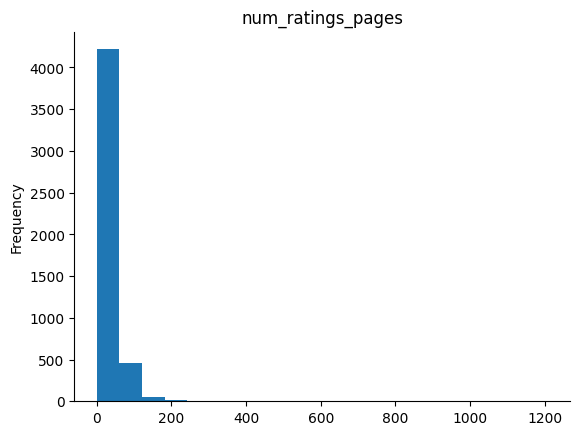

In [10]:
# @title num_ratings_pages

from matplotlib import pyplot as plt
user['num_ratings_pages'].plot(kind='hist', bins=20, title='num_ratings_pages')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
movie = pd.read_csv('/content/movie_data.csv', lineterminator='\n')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285504 entries, 0 to 285503
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   285504 non-null  object 
 1   genres                274872 non-null  object 
 2   image_url             264407 non-null  object 
 3   imdb_id               243802 non-null  object 
 4   imdb_link             243802 non-null  object 
 5   movie_id              285502 non-null  object 
 6   movie_title           283339 non-null  object 
 7   original_language     274872 non-null  object 
 8   overview              261248 non-null  object 
 9   popularity            274872 non-null  float64
 10  production_countries  274872 non-null  object 
 11  release_date          271050 non-null  object 
 12  runtime               270055 non-null  float64
 13  spoken_languages      274872 non-null  object 
 14  tmdb_id               279917 non-null  float64
 15  

In [12]:
movie.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0


In [13]:

movs = movie.loc[:,["movie_id","movie_title","genres"]]

In [14]:
movs = movs.dropna(subset=['movie_id','movie_title'])
movs['genres'] = movs['genres'].fillna('Others')
movs['genres'] = movs['genres'].str.replace(r'^\[\]$|^$|^"|"$', 'Others')

<ipython-input-14-ba4232388715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movs['genres'] = movs['genres'].fillna('Others')
<ipython-input-14-ba4232388715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movs['genres'] = movs['genres'].str.replace(r'^\[\]$|^$|^"|"$', 'Others')


In [15]:
import re

In [16]:
def clean_genre(genre):
  # Replace unwanted characters within genres while preserving commas
  return re.sub(r'[^\w\s,]', '', genre)

In [17]:
movs['genres'] = movs['genres'].apply(clean_genre)
movs['genres'] = movs['genres'].str.replace(',', ', ')

In [18]:
df = pd.merge(movs, ratings)

In [19]:
data = df.drop(columns=['_id'])
data = data.loc[:,['user_id','rating_val','movie_title','movie_id','genres']]

In [20]:
data.head()

,user_id,rating_val,movie_title,movie_id,genres
0,loureviews,7,Football Freaks,football-freaks,"Music, Animation"
1,m_penalosa,8,Aftermath,aftermath-1960,
2,vadekawa,9,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
3,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
4,erich4chi,8,Where Chimneys Are Seen,where-chimneys-are-seen,Drama


In [21]:
ratings.dropna(inplace=True)

In [22]:
ratings.isnull().sum()

,0
_id,0
movie_id,0
rating_val,0
user_id,0


In [23]:
old_n_users, old_n_movies = ratings["user_id"].nunique(), ratings["movie_id"].nunique()
print(f'old data set have {old_n_users} unique user, {old_n_movies} unique movie, with {len(ratings)} rating.')


user_movie_counts = ratings.groupby('user_id')['movie_id'].nunique()

threshold = 10
users_to_remove = user_movie_counts[user_movie_counts <= threshold].index
ratings = ratings[~ratings['user_id'].isin(users_to_remove)]

n_users, n_movies = ratings["user_id"].nunique(), ratings["movie_id"].nunique()
print(f'new data set have{n_users}  unique user, {n_movies} unique movie, with {len(ratings)} rating.')

old data set have 7477 unique user, 286070 unique movie, with 11078161 rating.
new data set have7366  unique user, 286068 unique movie, with 11077634 rating.


In [24]:
rating_counts = ratings['rating_val'].value_counts()
rating_counts

,count
rating_val,
8,2174389
6,2162938
7,2033546
5,1113411
4,948409
9,912026
10,752291
3,405437
2,383884


In [25]:
no_ratings = []
for i, rating in enumerate(rating_counts):
    no_ratings.append(rating_counts.get(i+1, 0))
no_ratings

[191303,
 383884,
 405437,
 948409,
 1113411,
 2162938,
 2033546,
 2174389,
 912026,
 752291]

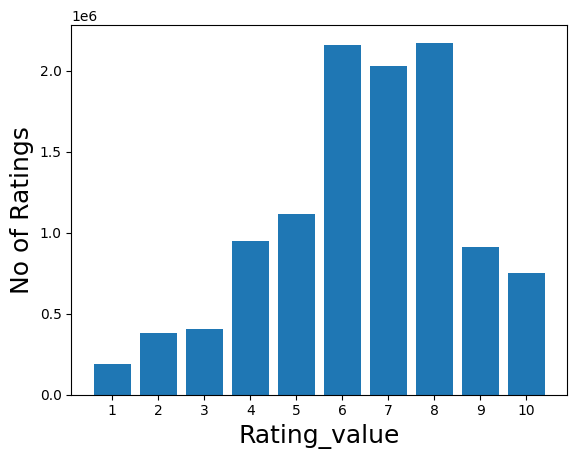

In [26]:
import matplotlib.pyplot as plt
import numpy as np
label = range(1, len(rating_counts) + 1)
index = np.arange(len(label))
plt.bar(index, no_ratings)
plt.xlabel('Rating_value', fontsize=18)
plt.ylabel('No of Ratings', fontsize=18)
plt.xticks(index, label, fontsize=10)
plt.show()

In [27]:
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [28]:
df.head()

,movie_id,movie_title,genres,_id,rating_val,user_id
0,football-freaks,Football Freaks,"Music, Animation",5fc6809d6758f69634e02512,7,loureviews
1,aftermath-1960,Aftermath,,5fc58dd56758f69634c9c581,8,m_penalosa
2,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc5815d6758f696346ffe97,9,vadekawa
3,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc588a96758f69634a0dcd4,6,vrizov
4,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc5912d6758f69634e05008,8,erich4chi


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ratings["transformed_user_id"] = label_encoder.fit_transform(ratings["user_id"])

ratings["transformed_movie_id"] = label_encoder.fit_transform(ratings["movie_id"])

transformed_data = ratings[["transformed_user_id", "transformed_movie_id", "rating_val"]]


In [30]:
transformed_data

,transformed_user_id,transformed_movie_id,rating_val
0,1698,78839,7
1,1698,137030,7
2,1698,192644,7
3,1698,229052,4
4,1698,140812,5
...,...,...,...
11078162,6872,13644,6
11078163,6872,26741,7
11078164,6872,178973,6
11078165,6872,279998,7


In [31]:
user_mappings = ratings[["user_id", "transformed_user_id"]].drop_duplicates()
movie_mappings = ratings[["movie_id", "transformed_movie_id"]].drop_duplicates()

In [32]:
transformed_data.rename(columns={"transformed_user_id": "user_id",
                                 "transformed_movie_id": "movie_id"}, inplace=True)

<ipython-input-32-70502fec0950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data.rename(columns={"transformed_user_id": "user_id",


In [33]:
transformed_data

,user_id,movie_id,rating_val
0,1698,78839,7
1,1698,137030,7
2,1698,192644,7
3,1698,229052,4
4,1698,140812,5
...,...,...,...
11078162,6872,13644,6
11078163,6872,26741,7
11078164,6872,178973,6
11078165,6872,279998,7


In [34]:
user_mappings

,user_id,transformed_user_id
0,deathproof,1698
1012,kurstboy,3913
2019,davidehrlich,1653
4025,adrianbalboa,123
5032,ingridgoeswest,3088
...,...,...
11011645,mateazember,4389
11011886,finnvor1,2365
11012210,daniel,1583
11047422,butterflyfilms,995


In [35]:
movie_mappings

,movie_id,transformed_movie_id
0,feast-2014,78839
1,loving-2016,137030
2,scripted-content,192644
3,the-future,229052
4,mank,140812
...,...,...
11077853,the-western-world-of-sailor-moon,255699
11077902,shadowplay,195567
11077941,only-always-you,165253
11078032,one-night-stand-ellen-degeneres,164856


In [36]:
from sklearn.model_selection import train_test_split

X = transformed_data[['user_id', 'movie_id']]
y = transformed_data['rating_val']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [37]:
import tensorflow
from tensorflow import keras
from sklearn import preprocessing
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, concatenate, multiply, Input
from keras.optimizers import Adam

In [38]:
def create_model(dim_embedding_user = 50, dim_embedding_movie = 50, layer_size = 20):

    # movie embedding
    movie_input = Input(shape=[1],name = 'Movie')
    movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
    movie_vec = Flatten(name='movie_flatten')(movie_embedding)
    movie_vec = Dropout(0.2)(movie_vec)

    # user embedding
    user_input = Input(shape=[1],name='User')
    user_embedding = Embedding(n_users+1,dim_embedding_user,name = 'User-Embedding')(user_input)
    user_vec = Flatten(name='user_flatten')(user_embedding)
    user_vec = Dropout(0.2)(user_vec)

    #concatenate flattened values
    concat = concatenate([movie_vec,user_vec])
    concat_dropout = Dropout(0.2)(concat)

    #dense layer
    dense = Dense(layer_size,name='Full-Connected',activation='relu')(concat)
    result = Dense(1,activation='relu',name='Activation')(dense)

    model = Model([user_input,movie_input],result)
    model.summary()
    return model

In [39]:
hists, models, test_results = {}, [], {}

In [ ]:
model = create_model()
model.compile(optimizer= Adam(learning_rate = 0.002),
              loss= ['mse'],
              metrics=['mean_absolute_error'])
hists["1024-batch-20-epoch"] = model.fit([X_train['user_id'],X_train['movie_id']],
                                    y_train,
                                    batch_size = 1024,
                                    validation_split = 0.1,
                                    epochs = 20,
                                    verbose = 1)
models.append(model)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Movie (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie-Embedding           │ (None, 1, 50)          │     14,303,450 │ Movie[0][0]            │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User-Embedding            │ (None, 1, 50)          │        368,350 │ User[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_flatten (Flatten)   │ (None, 50)             │              0 │ Movie-Embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_flatten (Flatten)    │ (None, 50)             │              0 │ User-Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 50)             │              0 │ movie_flatten[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 50)             │              0 │ user_flatten[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100)            │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Full-Connected (Dense)    │ (None, 20)             │          2,020 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Activation (Dense)        │ (None, 1)              │             21 │ Full-Connected[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,673,841 (55.98 MB)

 Trainable params: 14,673,841 (55.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 1938s 249ms/step - loss: 4.3509 - mean_absolute_error: 1.4894 - val_loss: 2.2209 - val_mean_absolute_error: 1.1406
Epoch 2/20
6742/7789 ━━━━━━━━━━━━━━━━━━━━ 4:17 246ms/step - loss: 2.1793 - mean_absolute_error: 1.1298

In [ ]:
hists

In [ ]:
models

In [ ]:
test_results["1024-batch-size-20-epoch"] = models[0].evaluate(x=[X_test['user_id'],X_test['movie_id']],y=y_test,verbose=1)

In [ ]:
pd.DataFrame(hists['1024-batch-20-epoch'].history).plot(figsize=(8,5), title=model)

In [ ]:
selected_model = models[0]

In [ ]:
def make_pred(username, moviename):
    input_user_id = user_mappings[user_mappings["user_id"] == username]["transformed_user_id"].iloc[0]

    input_movie_id = movie_mappings[movie_mappings["movie_id"] == moviename]["transformed_movie_id"].iloc[0]

    return selected_model.predict([np.array([input_user_id]), np.array([input_movie_id])], verbose=0)

In [ ]:
print(user_mappings[0:2003])

In [ ]:
username = 'mfpixiedust'
size=500

movies = ratings[ratings['user_id'] != username]['movie_id'].to_list()

random_int = np.random.randint(size, len(movies))
for movie in movies[random_int-size:random_int]:
  for in range(10):
    if make_pred(username, movie)[0][0] > 8.5:
      print(f"movie: {movie}, rating: {make_pred(username, movie)[0][0]}")